In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

# Needed for visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
# Read the dataset file with the Pandas 
dataset_df = pd.read_csv("../Outputs/Dataset/Employee_attrition.csv")

# Display the dataframe
dataset_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [3]:
# Display all columns in the dataset
dataset_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Business Travel statistics
dataset_df['BusinessTravel'].value_counts()

BusinessTravel
Travel Rarely        1043
Travel Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [5]:
# Department statistics
dataset_df['Department'].value_counts()


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [6]:
# EducationField statistics
dataset_df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [7]:
# Job Role statistics
dataset_df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [8]:
# Marial Status statistics
dataset_df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

## Employee Attrition

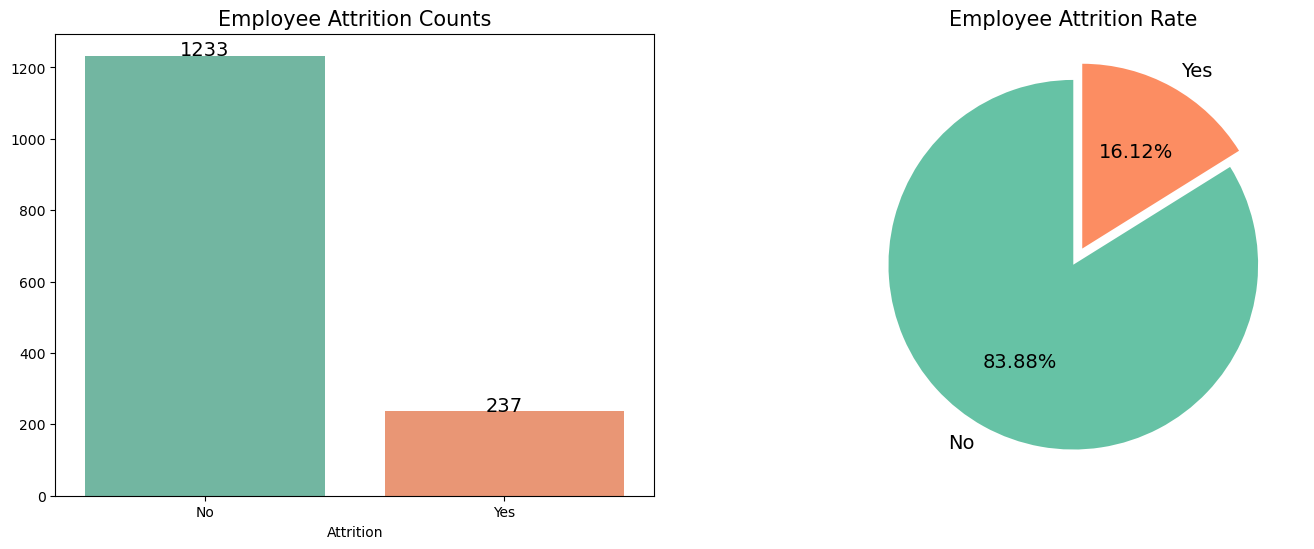

In [9]:
# Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = dataset_df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts", size=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

# Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
plt.title("Employee Attrition Rate", size=15)

# Save picture
plt.savefig("../Outputs/Visualisations/employee_attrition.png")

In [10]:
attrition_yes_df = dataset_df[dataset_df['Attrition'] == 'Yes']
attrition_yes_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,37,Yes,Travel Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
14,28,Yes,Travel Rarely,103,Research & Development,24,Bachelor,Life Sciences,High,Male,...,Excellent,Medium,0,6,4,Better,4,2,0,3
21,36,Yes,Travel Rarely,1218,Sales,9,Master,Life Sciences,High,Male,...,Outstanding,Medium,0,10,4,Better,5,3,0,3
24,34,Yes,Travel Rarely,699,Research & Development,6,Below College,Medical,Medium,Male,...,Excellent,High,0,8,2,Better,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel Frequently,638,Sales,9,Bachelor,Marketing,Very High,Male,...,Excellent,Low,1,1,3,Good,1,0,1,0
1442,29,Yes,Travel Rarely,1092,Research & Development,1,Master,Medical,Low,Male,...,Excellent,Medium,3,4,3,Best,2,2,2,2
1444,56,Yes,Travel Rarely,310,Research & Development,7,College,Technical Degree,Very High,Male,...,Excellent,Very High,1,14,4,Bad,10,9,9,8
1452,50,Yes,Travel Frequently,878,Sales,1,Master,Life Sciences,Medium,Male,...,Excellent,Very High,2,12,3,Better,6,3,0,1


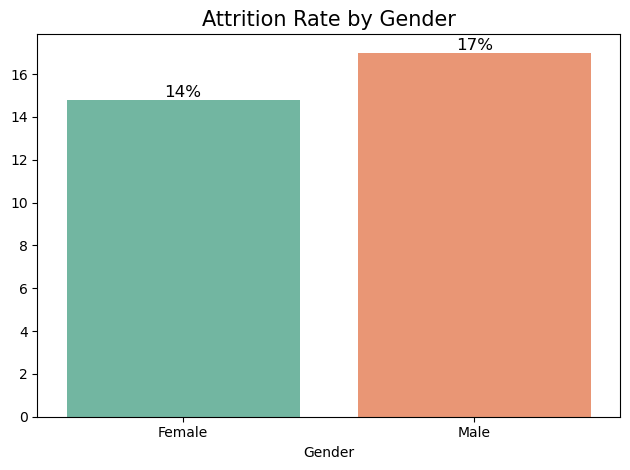

In [11]:
# Attrition rate by Gender
gender_counts = dataset_df['Gender'].value_counts()
gender_yes_counts = attrition_yes_df['Gender'].value_counts()
gender_attrition_rate = ((gender_yes_counts / gender_counts) * 100).sort_values()
sns.barplot(x=gender_attrition_rate.index, y=gender_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Gender", size=15)
for index, value in enumerate(gender_attrition_rate):
    plt.text(index, value, f"{int(gender_attrition_rate[index])}%" , ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/gender_attrition.png")

plt.show()

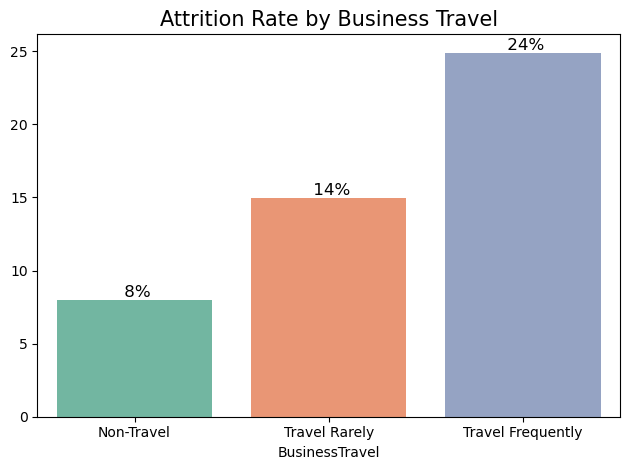

In [12]:
# Attrition rate by Business Travel
business_travel_counts = dataset_df['BusinessTravel'].value_counts()
business_travel_yes_counts = attrition_yes_df['BusinessTravel'].value_counts()
business_travel_attrition_rate = ((business_travel_yes_counts / business_travel_counts) * 100).sort_values()
sns.barplot(x=business_travel_attrition_rate.index, y=business_travel_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Business Travel", size=15)
for index, value in enumerate(business_travel_attrition_rate):
    plt.text(index, value, f" {int(business_travel_attrition_rate[index])}%" , ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/business_travel_attrition.png")

plt.show()

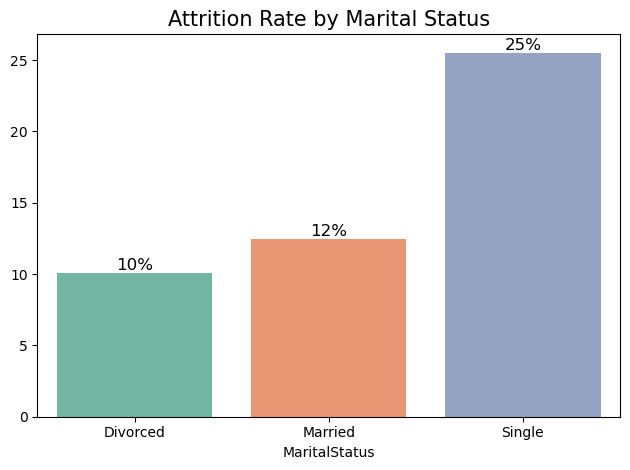

In [13]:
# Attrition rate by Marial Status
marital_status_counts = dataset_df['MaritalStatus'].value_counts()
marital_status_yes_counts = attrition_yes_df['MaritalStatus'].value_counts()
marital_status_attrition_rate = ((marital_status_yes_counts / marital_status_counts) * 100).sort_values()
sns.barplot(x=marital_status_attrition_rate.index, y=marital_status_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Marital Status", size=15)
for index, value in enumerate(marital_status_attrition_rate):
    plt.text(index, value, f"{int(marital_status_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/marital_status_attrition.png")

plt.show()

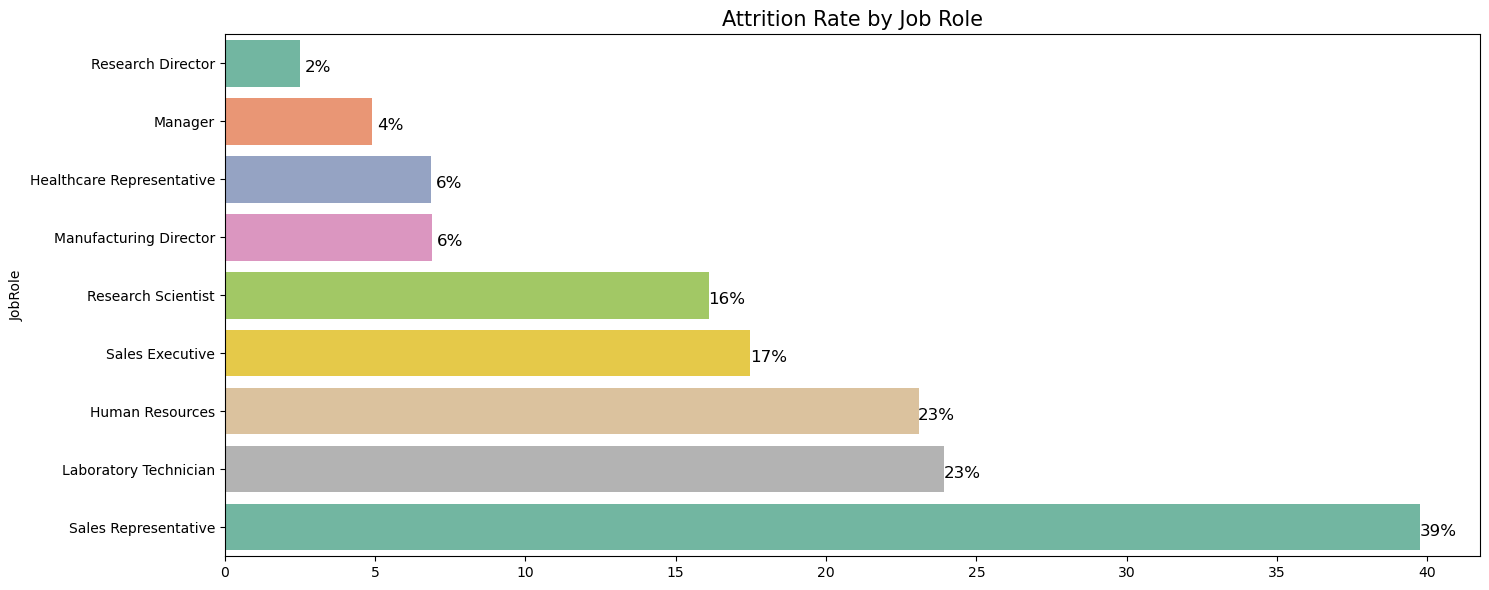

In [35]:
# Attrition rate by Job Role
plt.figure(figsize=(15,6))
job_role_counts = dataset_df['JobRole'].value_counts()
job_role_yes_counts = attrition_yes_df['JobRole'].value_counts()
job_role_attrition_rate = ((job_role_yes_counts / job_role_counts) * 100).sort_values()
sns.barplot(x=job_role_attrition_rate.values, y=job_role_attrition_rate.index, palette= "Set2",orient="h")
plt.title("Attrition Rate by Job Role", size=15)
for index, value in enumerate(job_role_attrition_rate):
    plt.text(value + 0.6, index + 0.2, f"{int(job_role_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/job_role_attrition.png")

plt.show()

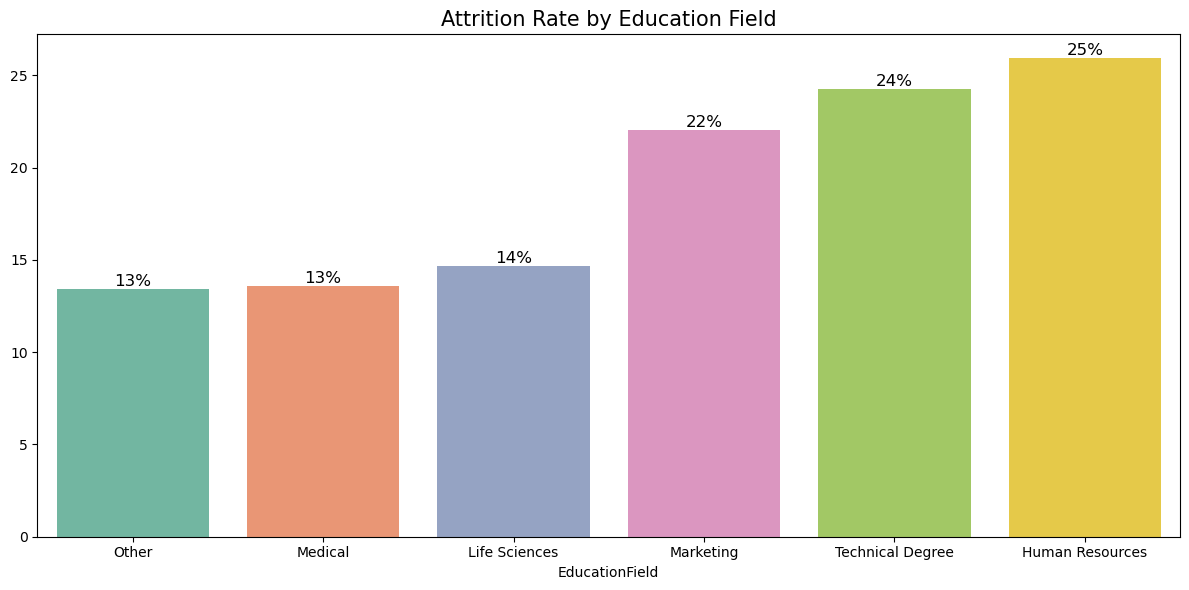

In [15]:
# Attrition rate by Education Field
plt.figure(figsize=(12,6))
educational_field_counts = dataset_df['EducationField'].value_counts()
educational_field_yes_counts = attrition_yes_df['EducationField'].value_counts()
educational_field_attrition_rate = ((educational_field_yes_counts / educational_field_counts) * 100).sort_values()
sns.barplot(x=educational_field_attrition_rate.index, y=educational_field_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Education Field", size=15)
for index, value in enumerate(educational_field_attrition_rate):
    plt.text(index, value, f"{int(educational_field_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/educational_field_attrition.png")

plt.show()

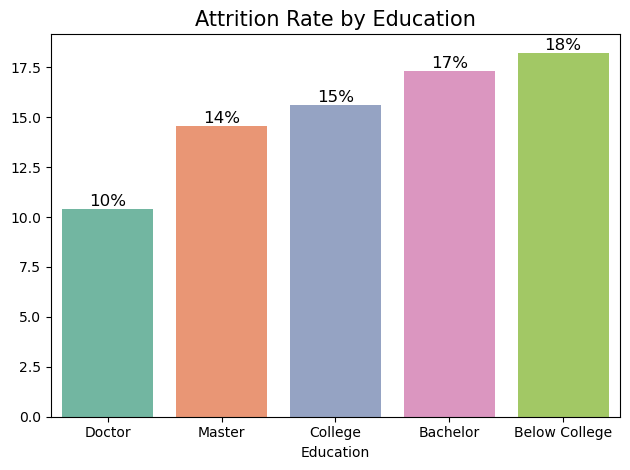

In [16]:
# Attrition rate by Education
education_counts = dataset_df['Education'].value_counts()
education_yes_counts = attrition_yes_df['Education'].value_counts()
education_attrition_rate = ((education_yes_counts / education_counts) * 100).sort_values()
sns.barplot(x=education_attrition_rate.index, y=education_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Education", size=15)
for index, value in enumerate(education_attrition_rate):
    plt.text(index, value, f"{int(education_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/education_attrition.png")

plt.show()

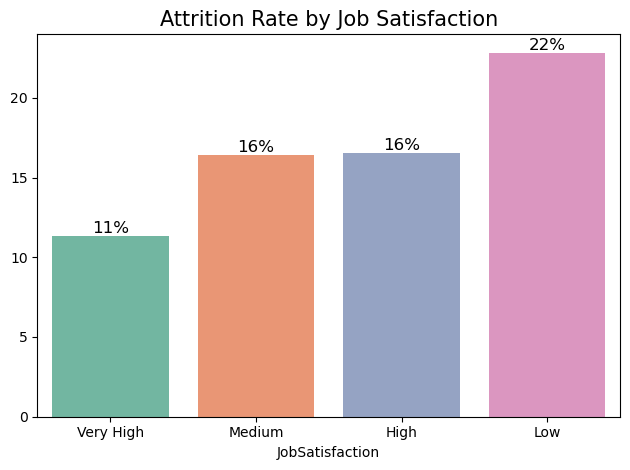

In [17]:
# Attrition rate by Job Satisfaction
job_satisfaction_counts = dataset_df['JobSatisfaction'].value_counts()
job_satisfaction_yes_counts = attrition_yes_df['JobSatisfaction'].value_counts()
job_satisfaction_attrition_rate = ((job_satisfaction_yes_counts / job_satisfaction_counts) * 100).sort_values()
sns.barplot(x=job_satisfaction_attrition_rate.index, y=job_satisfaction_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Job Satisfaction", size=15)
for index, value in enumerate(job_satisfaction_attrition_rate):
    plt.text(index, value, f"{int(job_satisfaction_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/Job_satisfaction_attrition.png")

plt.show()

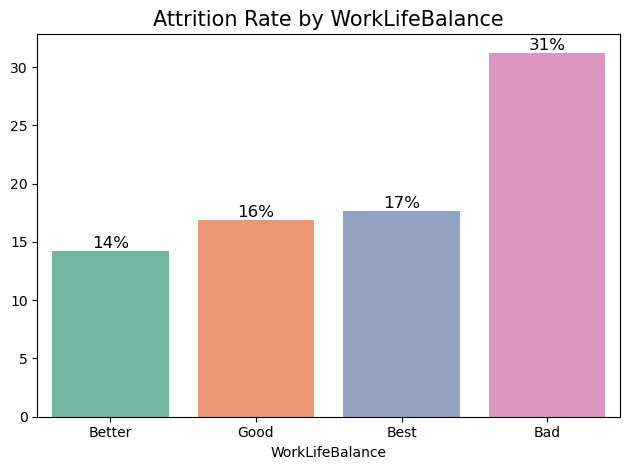

In [18]:
# Attrition rate by WorkLife Balance
work_life_balance_counts = dataset_df['WorkLifeBalance'].value_counts()
work_life_balance_yes_counts = attrition_yes_df['WorkLifeBalance'].value_counts()
work_life_balance_attrition_rate = ((work_life_balance_yes_counts / work_life_balance_counts) * 100).sort_values()
sns.barplot(x=work_life_balance_attrition_rate.index, y=work_life_balance_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by WorkLifeBalance", size=15)
for index, value in enumerate(work_life_balance_attrition_rate):
    plt.text(index, value, f"{int(work_life_balance_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/WorkLife_Balance_attrition.png")

plt.show()

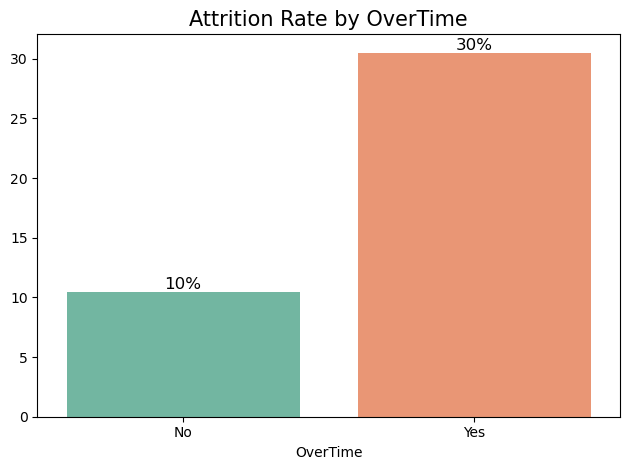

In [19]:
# Attrition rate by OverTime
overtime_counts = dataset_df['OverTime'].value_counts()
overtime_yes_counts = attrition_yes_df['OverTime'].value_counts()
overtime_attrition_rate = ((overtime_yes_counts / overtime_counts) * 100).sort_values()
sns.barplot(x=overtime_attrition_rate.index, y=overtime_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by OverTime", size=15)
for index, value in enumerate(overtime_attrition_rate):
    plt.text(index, value, f"{int(overtime_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/OverTime_attrition.png")

plt.show()

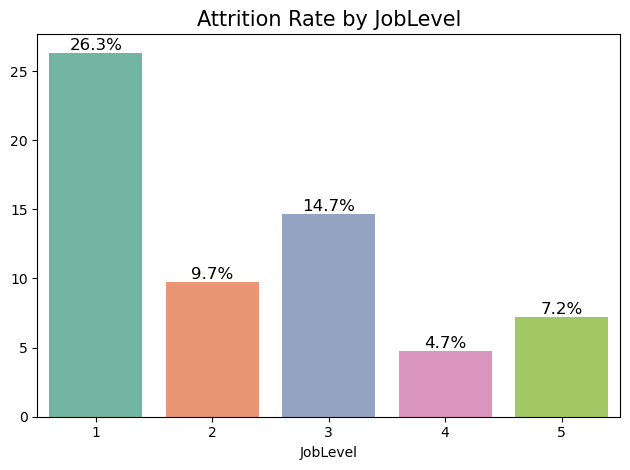

In [21]:
# Attrition rate by JobLevel
job_level_counts = dataset_df['JobLevel'].value_counts()
job_level_yes_counts = attrition_yes_df['JobLevel'].value_counts()
job_level_attrition_rate = ((job_level_yes_counts / job_level_counts) * 100)
sns.barplot(x=job_level_attrition_rate.index, y=job_level_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by JobLevel", size=15)
for index, value in enumerate(job_level_attrition_rate):
    plt.text(index, value, f"{value:.1f}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/JobLevel_attrition.png")

plt.show()

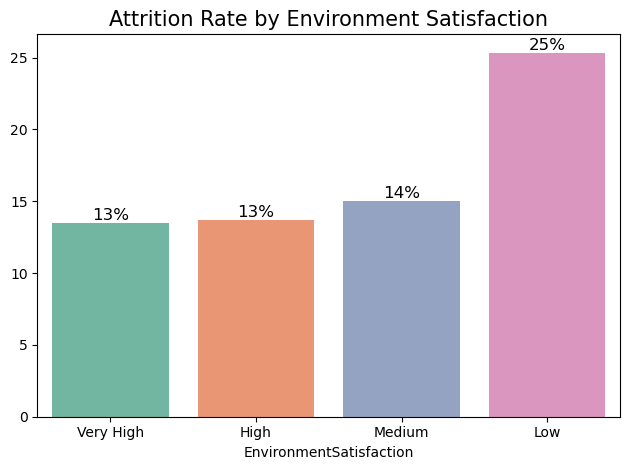

In [22]:
# Attrition rate by EnvironmentSatisfaction
environment_counts = dataset_df['EnvironmentSatisfaction'].value_counts()
environment_yes_counts = attrition_yes_df['EnvironmentSatisfaction'].value_counts()
environment_attrition_rate = ((environment_yes_counts / environment_counts) * 100).sort_values()
sns.barplot(x=environment_attrition_rate.index, y=environment_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by Environment Satisfaction", size=15)
for index, value in enumerate(environment_attrition_rate):
    plt.text(index, value, f"{int(environment_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/EnvironmentSatisfaction_attrition.png")

plt.show()

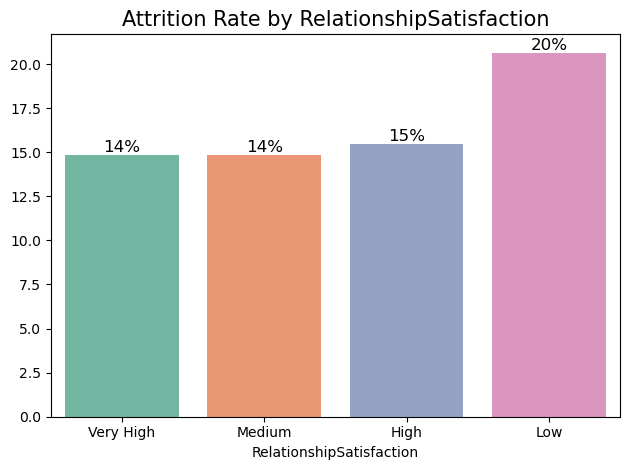

In [23]:
# Attrition rate by RelationshipSatisfaction
relationship_counts = dataset_df['RelationshipSatisfaction'].value_counts()
relationship_yes_counts = attrition_yes_df['RelationshipSatisfaction'].value_counts()
relationship_attrition_rate = ((relationship_yes_counts / relationship_counts) * 100).sort_values()
sns.barplot(x=relationship_attrition_rate.index, y=relationship_attrition_rate.values, palette= "Set2")
plt.title("Attrition Rate by RelationshipSatisfaction", size=15)
for index, value in enumerate(relationship_attrition_rate):
    plt.text(index, value, f"{int(relationship_attrition_rate[index])}%", ha="center", va="bottom", size=12)
plt.tight_layout()

plt.savefig("../Outputs/Visualisations/RelationshipSatisfaction_attrition.png")

plt.show()